# 1. Exploring lc files:

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.stats import sigma_clipped_stats

Opening the lc files and storing them in an array

In [8]:
lc1=fits.open('ch2_xsm_20210923_v1_level2.lc')
lc2=fits.open('ch2_xsm_20210924_v1_level2.lc')
lc3=fits.open('ch2_xsm_20210927_v1_level2.lc')
lc4=fits.open('ch2_xsm_20210928_v1_level2.lc')
lc5=fits.open('ch2_xsm_20210929_v1_level2.lc')
lc_arr=(lc1,lc2,lc3,lc4,lc5)

Showing the HDUlist of each fits file

In [9]:
for lc in lc_arr:
    lc.info()

Filename: ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
Filename: ch2_xsm_20210924_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   83434R x 4C   [D, E, E, E]   
Filename: ch2_xsm_20210927_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   83613R x 4C   [D, E, E, E]   
Filename: ch2_xsm_20210928_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84991R x 4C   [D, E, E, E]   
Filename: ch2_xsm_20210929_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Forma

We have seen that each fits file contains two headers. One is PRIMARY and other one is RATE.
Let's now open both the headers

In [10]:
lc1_primary=lc1[0].header
lc1_rate=lc1[1].header

In [11]:
lc1_primary

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [12]:
lc1_rate

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

We have noticed that the RATE header contains count rate information. Hence it will be more important for further calculation

# 2. Lightcurves:

Loading data from RATE header, finding what all information does it contain and what is the data type

In [13]:
lc1_data=lc1[1].data
lc1_data

FITS_rec([(1.49126401e+08, 494.83276, 22.244837, 1.),
          (1.49126402e+08, 518.2688 , 22.765518, 1.),
          (1.49126403e+08, 504.4697 , 22.460403, 1.), ...,
          (1.49212797e+08, 376.00684, 19.390896, 1.),
          (1.49212798e+08, 374.12167, 19.342226, 1.),
          (1.49212799e+08, 401.34076, 20.033491, 1.)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

In [14]:
print('Data type:')
print(lc1_data.dtype)

Data type:
(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])


We can see that this data contains time, count rate, error etc...

Now plotting lightcurves for each fits file:

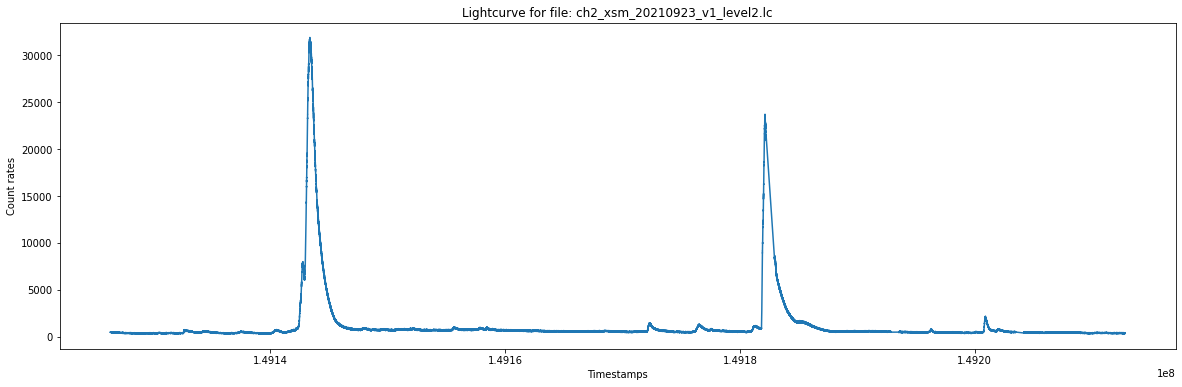

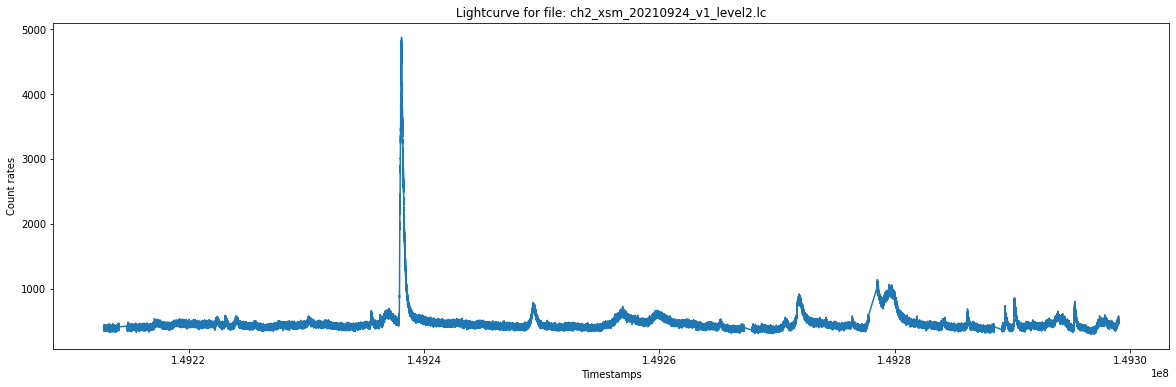

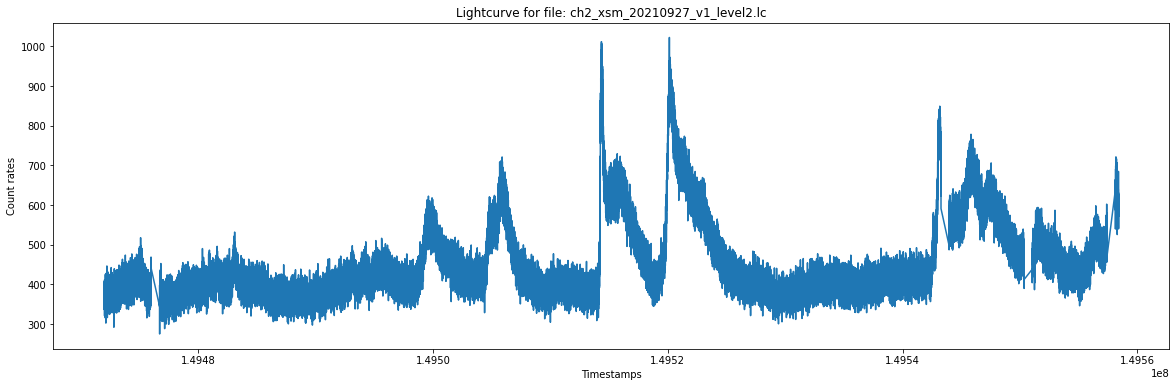

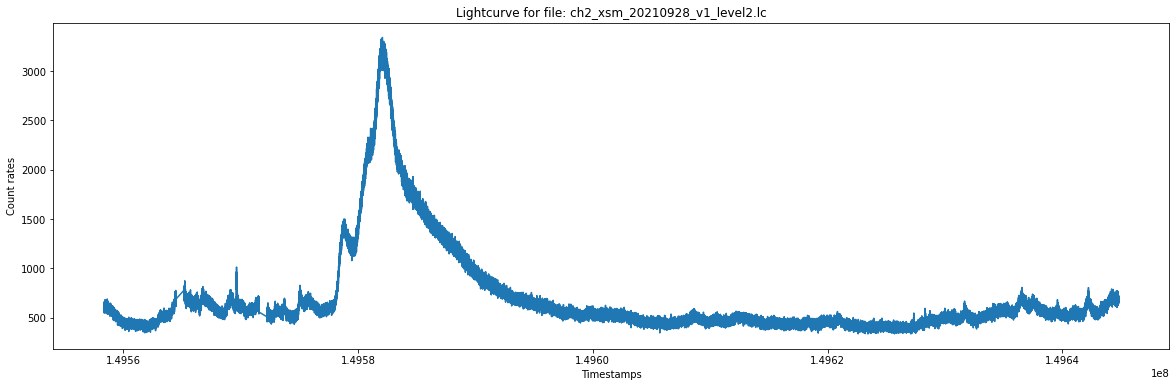

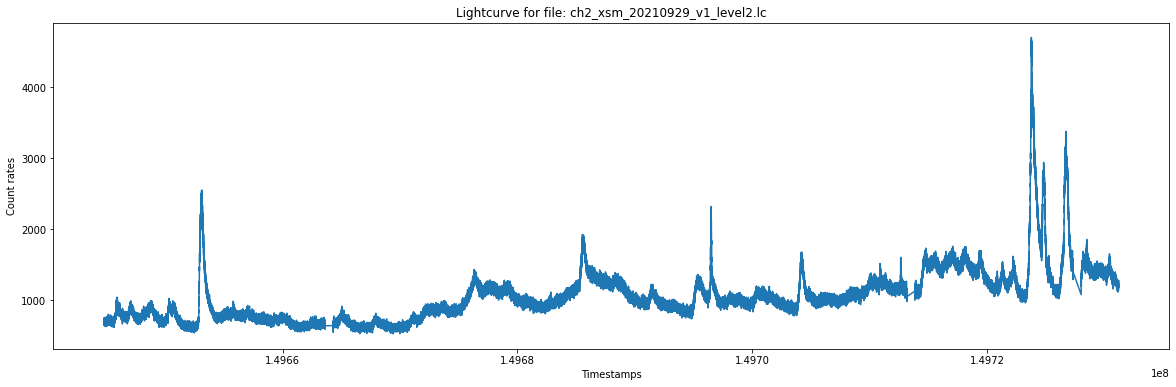

In [15]:
for lc in lc_arr:
    plt.figure(figsize=(20,6))
    plt.plot(lc[1].data['TIME'], lc[1].data['RATE'])
    plt.xlabel("Timestamps")
    plt.ylabel("Count rates")
    plt.title(f"Lightcurve for file: {lc[0].header['FILENAME']}")

From the above plots we can observe that the duration of observing the counts rates for each fits file is about 86400 seconds i.e. one day. 

# 3. Flares:

Flares can be identified visually where the peaks in light curves occur. The start time and stop time of the flares are the ones where a drastic change in slope is observed.

For plot1:
//flare1: start time = 1.491425e8 sec, stop time = 1.491455e8 sec
//flare2: start time = 1.491817e8 sec, stop time = 1.491848e8 sec

For plot2:
flare3: start time = 1.492378e8 sec, stop time = 1.492390e8 sec    

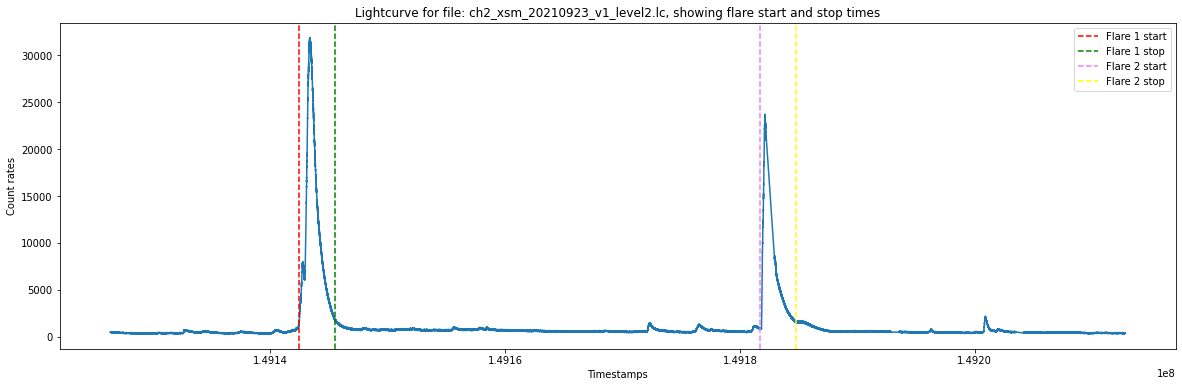

In [16]:
plt.figure(figsize = (20, 6))
plt.plot(lc1[1].data['TIME'], lc1[1].data['RATE'])
plt.xlabel("Timestamps")
plt.ylabel("Count rates")
plt.title(f"Lightcurve for file: {lc1[0].header['FILENAME']}, showing flare start and stop times")
plt.axvline(x = 1.491425e8, color = "red", label = "Flare 1 start", linestyle = "dashed")
plt.axvline(x = 1.491455e8, color = "green", label = "Flare 1 stop", linestyle = "dashed")
plt.axvline(x = 1.491817e8, color = "violet", label = "Flare 2 start", linestyle = "dashed")
plt.axvline(x = 1.491848e8, color = "yellow", label = "Flare 2 stop", linestyle = "dashed")
plt.legend()

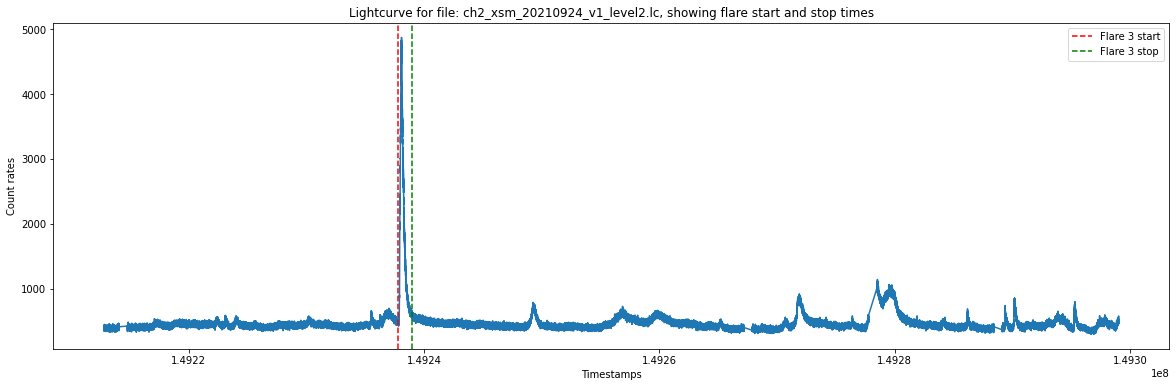

In [17]:
plt.figure(figsize = (20, 6))
plt.plot(lc2[1].data['TIME'], lc2[1].data['RATE'])
plt.xlabel("Timestamps")
plt.ylabel("Count rates")
plt.title(f"Lightcurve for file: {lc2[0].header['FILENAME']}, showing flare start and stop times")
plt.axvline(x = 1.492378e8, color = "red", label = "Flare 3 start", linestyle = "dashed")
plt.axvline(x = 1.492390e8, color = "green", label = "Flare 3 stop", linestyle = "dashed")
plt.legend()

Calculation of mean count rate of the flare window:

In [18]:
# Assigning the start and stop time for the first Flare
flare1_start = 1.491425e8
flare1_stop = 1.491455e8
flare1_time = lc1[1].data['TIME']
flare1_window = np.intersect1d(np.where(flare1_time < flare1_stop)[0],np.where(flare1_time > flare1_start)[0])
flare1_rates = lc1[1].data['RATE'][flare1_window]
print(f"Mean count rate for first flare = {np.mean(flare1_rates)}")

#  Assigning the start and stop time for the second Flare
flare2_start = 1.491817e8
flare2_stop = 1.491848e8
flare2_time = lc1[1].data['TIME']
flare2_window = np.intersect1d(np.where(flare2_time < flare2_stop)[0],np.where(flare2_time > flare2_start)[0])
flare2_rates = lc1[1].data['RATE'][flare2_window]
print(f"Mean count rate for second flare = {np.mean(flare2_rates)}")


Mean count rate for first flare = 11809.54296875
Mean count rate for second flare = 5585.35595703125


Calculating the peak count rate of the flare window

In [19]:
peak1_rate=np.max(flare1_rates)
peak2_rate=np.max(flare2_rates)
print('The peak count rate of flare1 is=',peak1_rate)
print('The peak count rate of flare2 is=',peak2_rate)

The peak count rate of flare1 is= 31883.889
The peak count rate of flare2 is= 23705.484


Calculating the average slope of rise

In [20]:
# Getting the timestamps where the peak occurs
peak1_time=flare1_time[flare1_window[np.argmax(flare1_rates)]]
peak2_time=flare2_time[flare2_window[np.argmax(flare2_rates)]]
#calculating the slopes
slope1_rise=(peak1_rate-flare1_rates[0])/(peak1_time-flare1_start)
slope2_rise=(peak2_rate-flare2_rates[0])/(peak2_time-flare2_start)
print('The average slope of rise for flare1=',slope1_rise)
print('The average slope of rise for flare2=',slope2_rise)

The average slope of rise for flare1= 33.69883152353932
The average slope of rise for flare2= 51.280802227639846


Calculating the average slope of fall

In [21]:
slope1_fall=(peak1_rate-flare1_rates[-1])/(peak1_time-flare1_stop)
slope2_fall=(peak2_rate-flare2_rates[-1])/(peak2_time-flare2_stop)
print('The average slope of fall for flare1=',slope1_fall)
print('The average slope of fall for flare2=',slope2_fall)

The average slope of fall for flare1= -14.177774467836226
The average slope of fall for flare2= -8.353681286272597


Calculating mean background rates

In [22]:
total_rate=np.sum(lc1[1].data['RATE'])
bkg_rates=total_rate-np.sum(flare1_rates)-np.sum(flare2_rates)
mean_bkg_rates= bkg_rates/(len(lc1[1].data['TIME'])-len(flare1_window)-len(flare2_window))
print("The mean background rate for plot1=",mean_bkg_rates)

The mean background rate for plot1= 611.5977687626774


The mean background rates is much less than the flare count rates.